# Project 10 -- [Adam] [Ornelas]

## Question 1

In [1]:
import pandas as pd
myDF = pd.read_csv("/anvil/projects/tdm/data/flights/subset/1990.csv", usecols=[16])
#calling the df using 16 columns
myvalue = myDF['Origin'].value_counts()["IND"] # all the flights from indiana as the origin
print(myvalue)
del(myDF) #deleting the data so we can reset it

43826


In [2]:
# we are recreating the code in a function now
def myindyflights (myyear: int) -> int:
    """
    The myindyflights function takes a year as the input, and returns the number of flights departing from Indianapolis airport during that year.

    Args:
    myyear (str): This is a year as the input

    Returns:
    myvalue (int): This is the number of flights departing from Indianapolis airport during that year.
    """
    myDF = pd.read_csv("/anvil/projects/tdm/data/flights/subset/" + str(myyear) + ".csv", usecols=[16])
    myvalue = myDF['Origin'].value_counts()["IND"]
    return myvalue

In [3]:
import pandas as pd
myindyflights(1990)
# we get the same value as the origional code.

43826

In [5]:
import pandas as pd
myresults = list(map(myindyflights, range(1987,2009)))
#map() finds the value for the myindyflights function for every year from 1987-2009
#map() send the results to list() so list() can put it in an array
# ex. map() returns 1,2,3,5 and list() returns [1,2,3,4,5]

In [7]:
sum(myresults) #adds all the flight totals from each year

796496

In [8]:
results2 = list(map(myindyflights, range(1987, 2008))) #flights from 1987-2008

In [9]:
sum(results2) #total number of flights from 1987-2008

782094

## Question 2

In [10]:
def myflights(myyear: int) -> int:
    """
    The myflights function takes a year as the input, and returns the number of flights departing from each airport during that year.

    Args:
    myyear (str): This is a year as the input

    Returns:
    myvalue (int): This is the number of flights departing from each airport during that year.
    """
    myDF = pd.read_csv("/anvil/projects/tdm/data/flights/subset/" + str(myyear) + ".csv", usecols=[16])
    myvalue = myDF['Origin'].value_counts()
    return myvalue

In [11]:
import pandas as pd
myflights(1990)

Origin
ATL    269397
ORD    269128
DFW    237924
LAX    169847
PHX    138558
        ...  
YAP       139
RDM       112
GST        86
SUN        66
PSE        61
Name: count, Length: 235, dtype: int64

In [12]:
import pandas as pd
myresults = list(map(myflights, range(1987,2009)))

In [13]:
pd.concat(myresults, axis=1).sum(axis=1) 
#concat lines up each year as a column 
#concat then adds them together horizontally 
#sum(axis=1) means add them horizontally (along columns).
#[ df_1987 | df_1988 | df_1989 | ... ]
# 1987     1988     1989
#0  1       4       7 = 12
#1  2       5       8 = 15
#2  3       6       9 = 18


Origin
ORD    6365070.0
ATL    5823454.0
DFW    5522740.0
LAX    3946884.0
DEN    3156846.0
         ...    
GLH          2.0
MKC          1.0
GCC         95.0
MKG         65.0
RKS         63.0
Length: 346, dtype: float64

<BarContainer object of 10 artists>

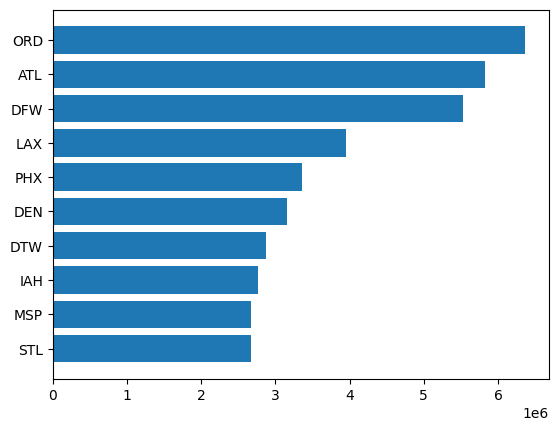

In [14]:
mycounts = pd.concat(myresults, axis=1).sum(axis=1).sort_values().tail(10)
# now we sort them and find the highest 10
#then plot
import matplotlib.pyplot as plt
plt.barh(mycounts.index, mycounts)

<BarContainer object of 10 artists>

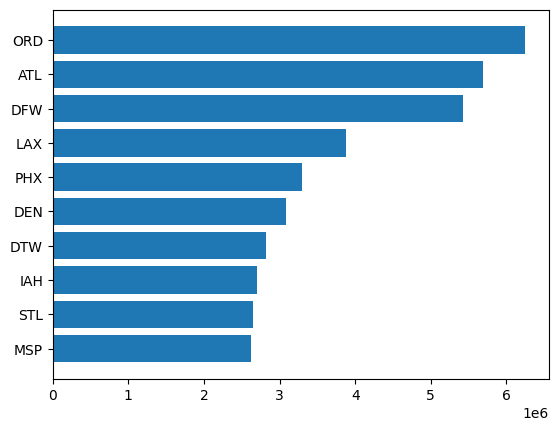

In [17]:
import pandas as pd
myresults = list(map(myflights, range(1987,2008)))#Flights from 1987-2008
pd.concat(myresults, axis=1).sum(axis=1) 
mycounts = pd.concat(myresults, axis=1).sum(axis=1).sort_values().tail(10)
# now we sort them and find the highest 10
#then plot
import matplotlib.pyplot as plt
plt.barh(mycounts.index, mycounts)

Markdown notes and sentences and analysis written here.

## Question 3

In [18]:
def myindydonations (myyear: int) -> int:
    """
    The myindydonations function takes a year as the input, and returns the amount of money donated from Indiana during that year.

    Args:
    myyear (str): This is a year as the input

    Returns:
    myvalue (int): This is the amount of money donated from Indiana during that year.
    """
    myDF = pd.read_csv("/anvil/projects/tdm/data/election/itcont" + str(myyear) + ".txt", header=None, sep='|', usecols=[9,14], encoding='Windows-1252')
    myDF.columns = ["STATE", "TRANSACTION_AMT"] #only reading two columns in df
    myvalue = myDF.groupby('STATE')['TRANSACTION_AMT'].sum()["IN"] #a subdata frame looking at transaction amount by state only in indiana
    #Sums the total 
    return myvalue

In [19]:
import pandas as pd
myindydonations(1990)

5440484

In [20]:
import pandas as pd
myresults = list(map(myindydonations, range(1980,2019,2))) #same things but jumps every 2 years

<BarContainer object of 20 artists>

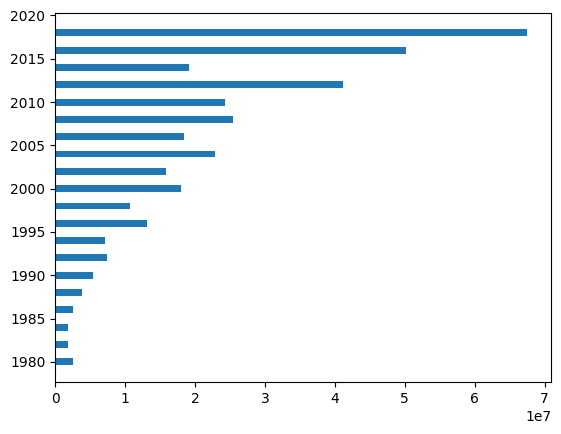

In [21]:
import matplotlib.pyplot as plt
plt.barh(range(1980,2019,2), myresults) #bar plot

<BarContainer object of 19 artists>

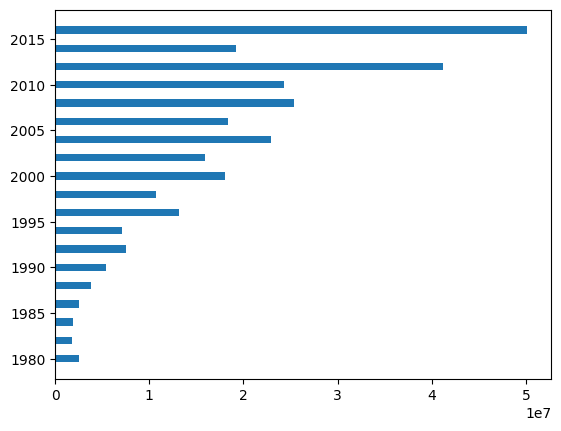

In [23]:
myresults = list(map(myindydonations, range(1980,2018,2))) # years 1980-2018
plt.barh(range(1980,2018,2), myresults) #bar plot

Markdown notes and sentences and analysis written here.

## Question 4

In [24]:
def mydonations (myyear: int) -> int: #ttl amount of donations from each year
    """
    The mydonations function takes a year as the input, and returns the amount of money donated from each state during that year.

    Args:
    myyear (str): This is a year as the input

    Returns:
    myvalue (int): This is the amount of money donated from each state during that year.
    """
    myDF = pd.read_csv("/anvil/projects/tdm/data/election/itcont" + str(myyear) + ".txt", header=None, sep='|', usecols=[9,14], encoding='Windows-1252')
    myDF.columns = ["STATE", "TRANSACTION_AMT"]
    myvalue = myDF.groupby('STATE')['TRANSACTION_AMT'].sum()
    return myvalue

In [25]:
import pandas as pd
mydonations(1990) #total amount from 1990

STATE
AK      601719
AL     4718757
AR     2380273
AS       10556
AZ     3082578
CA    43448729
CO     4482980
CT     6709767
DC    12943744
DE     1279905
FL    16688314
GA     6096551
GU        7995
HI     2557691
IA     3065919
ID      797140
IL    15264140
IN     5440484
KS     1825688
KY     4329631
LA     4763249
MA    10545757
MD     7066463
ME     1196380
MI     9035329
MN     5122643
MO     4676598
MS     2120024
MT      863468
NC     6010731
ND      262860
NE     2237154
NH     1882440
NJ    12411921
NM     1331478
NV     2132465
NY    34188115
OH     7667303
OK     2987993
OR     2462299
PA    11210499
PR      364479
RI     2029927
SC     1963972
SD      799218
TN     3451220
TX    26221487
UT      973959
VA     8744373
VI       58622
VT      397781
WA     2934344
WI     2760674
WV     1214006
WY      503158
XX        2000
ZZ      210160
Name: TRANSACTION_AMT, dtype: int64

In [26]:
import pandas as pd
myresults = list(map(mydonations, range(1980,2019,2))) #total amounnt from 1980 2019
pd.concat(myresults, axis=1).sum(axis=1) #concat to get total of each year

STATE
01         1814.0
AK     61180328.0
AL    271578030.0
AR    235648443.0
AS       384227.0
         ...     
SR          210.0
SY           40.0
TW           50.0
U*          195.0
VD          225.0
Length: 267, dtype: float64

<BarContainer object of 10 artists>

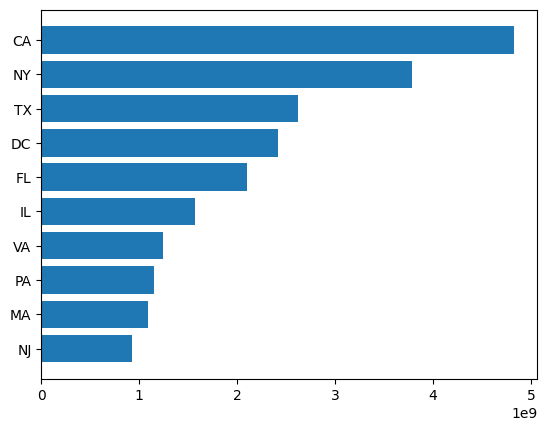

In [27]:
mycounts = pd.concat(myresults, axis=1).sum(axis=1).sort_values().tail(10)#now we sort and find the top 10
#then use bar plot
import matplotlib.pyplot as plt
plt.barh(mycounts.index, mycounts)

<BarContainer object of 10 artists>

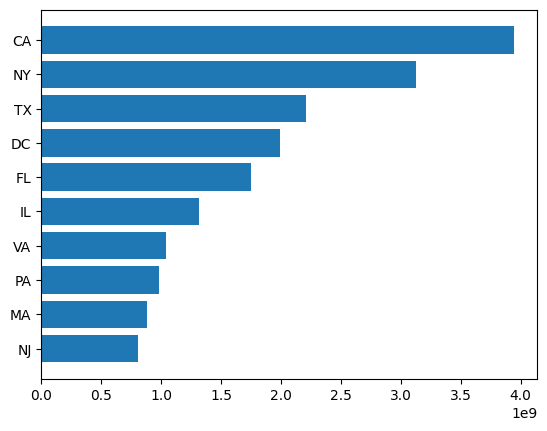

In [29]:
myresults = list(map(mydonations, range(1980,2018,2))) #total amounnt from 1980 2018
mycounts = pd.concat(myresults, axis=1).sum(axis=1).sort_values().tail(10)#now we sort and find the top 10
#then use bar plot
import matplotlib.pyplot as plt
plt.barh(mycounts.index, mycounts)

Markdown notes and sentences and analysis written here.

## Question 5

In [31]:
def myfares (mymonth: str) -> float: #total amount of taxi cab rides per day given the month
    """
    The myfares function takes a 2-character month as the input (in quotation marks, with a leading 0 if needed), and returns the amount of money spent on each day during that month

    Args:
    mymonth (str): This is a 2-character month (as a string) as the input

    Returns:
    mytable (float): This is the amount of money (as a floating point number) spent on each day during that month
    """
    myDF = pd.read_csv("/anvil/projects/tdm/data/taxi/yellow/yellow_tripdata_2018-" + mymonth + ".csv", usecols=[1,16])
    myDF['mydate'] = pd.to_datetime(myDF['tpep_pickup_datetime']).dt.strftime("%Y-%m-%d")
    mytable = myDF.groupby('mydate')['total_amount'].sum()
    return mytable

In [32]:
import pandas as pd
myfares("01") #total rides a day in january

mydate
2001-01-05          8.80
2002-12-31         43.26
2003-01-01        165.42
2008-12-31        323.40
2009-01-01        272.49
2017-01-02          2.90
2017-01-03          2.50
2017-12-31       3482.43
2018-01-01    3851903.00
2018-01-02    3733876.40
2018-01-03    4116953.89
2018-01-04    1760411.53
2018-01-05    4045099.72
2018-01-06    4178978.92
2018-01-07    3635668.78
2018-01-08    4285478.73
2018-01-09    4570982.06
2018-01-10    4627360.44
2018-01-11    4977450.01
2018-01-12    5097276.07
2018-01-13    4706551.09
2018-01-14    4237738.74
2018-01-15    3806294.95
2018-01-16    4738687.24
2018-01-17    4658825.15
2018-01-18    5170510.73
2018-01-19    5086014.55
2018-01-20    4367669.50
2018-01-21    3900908.03
2018-01-22    4078434.18
2018-01-23    4415845.88
2018-01-24    4889477.13
2018-01-25    5275927.59
2018-01-26    5274787.90
2018-01-27    4503028.01
2018-01-28    4041012.46
2018-01-29    4227184.11
2018-01-30    4556711.22
2018-01-31    4876567.84
2018-02-01       1

In [34]:
import pandas as pd
mymonths = [str(i).zfill(2) for i in range(1,13)] #passing each month into the function
#making sure its in 00 ex. 01, 02, 03
myresults = list(map(myfares, mymonths))

In [35]:
mycounts = pd.concat(myresults, axis=1).sum(axis=1)
betterdates = mycounts[pd.to_datetime(mycounts.index).strftime("%Y") == "2018"] #turning date string into datetime objects
#strftime("%Y") makes sure we are looking at 2018 year only

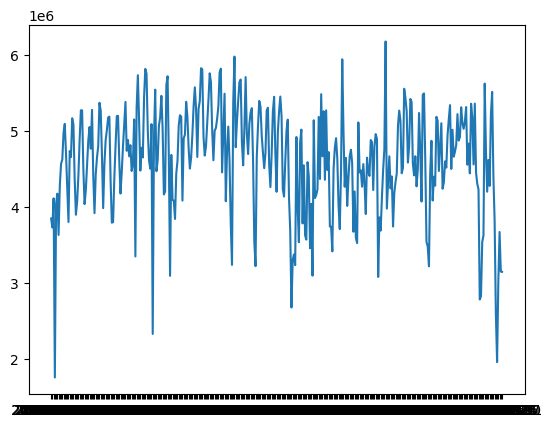

In [36]:
import matplotlib.pyplot as plt
plt.plot(betterdates.index, betterdates)

Markdown notes and sentences and analysis written here.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.